In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Tue Nov 22 20:25:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Information", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}") ; print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}") ; print(f"Percentage: {svmem.percent}%")

======================================== Memory Information ========================================
Total: 12.68GB
Available: 11.49GB
Used: 1012.56MB
Percentage: 9.4%


In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import Xception,InceptionResNetV2,ResNet50
from tensorflow.keras.applications import DenseNet121,DenseNet201,InceptionV3
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import cv2
import time
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD


In [ ]:
path= list(paths.list_images("/content/drive/MyDrive/breast-cancer-classification/tf_files/breast_40"))
len(path)
data=[]
labels=[]
p =0
# loop over the image paths
for imagePath in path:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]

	# load the input image (224x224) and preprocess it
	image = cv2.imread(imagePath)
	# image = cv2.resize(image,(224,224) , cv2.INTER_NEAREST )
	p = p+ 1
	print(p)
	# update the data and labels lists, respectively
	data.append(image[224:448 , 224:448])
	labels.append(label)

1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995


In [ ]:
class_ = np.unique(labels,return_counts=True)
print(class_[1][0] , class_[1][1])

b = float(len(data)) / (2*class_[1][0])  ######## The number of benign training classes
m = float(len(data)) / (2*class_[1][1])  ######## Number of malignant test classes
class_weight = {0:b , 1:m}
print('class weight:', class_weight)

625 1370
class weight: {0: 1.596, 1: 0.7281021897810219}


In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
data_train, data_test, labels_train, labels_test = train_test_split( data, labels, test_size=0.20, random_state=42)

In [ ]:
print(data_train.shape , data_test.shape)
print(labels_train.shape , labels_test.shape)

(1596, 224, 224, 3) (399, 224, 224, 3)
(1596,) (399,)


In [ ]:
lb = LabelBinarizer()
labels_train = lb.fit_transform(labels_train)
labels_train = to_categorical(labels_train,num_classes=2)


labels_test = lb.fit_transform(labels_test)
labels_test = to_categorical(labels_test,num_classes=2)

In [ ]:
baseModel = Xception(include_top=False, input_tensor=Input(shape=(224, 224, 3)), weights = 'imagenet')
headModel = baseModel.output
headModel =GlobalAveragePooling2D()(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel=Dropout(0.3)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
import random

def Data_generator(X,y, batch_size=8, augment=False):
    
    while True:
               
          for start in range(0, X.shape[0], batch_size):
              x_batch = []
              y_batch = []

              end = min(start + batch_size, X.shape[0])
              ids_batch = X[start:end]
              ids_batch1 = y[start:end]

              for idd in range(start,end):
              
                   a=random.randint(0,2)
                   if a==0:
                      image =X[idd] /255
                      image =np.fliplr(image) 
                      label =y[idd]
   
                   if a==1:
                      image =X[idd] /255
                      image =np.fliplr(image) 
                      label =y[idd]
                   elif a==2:
                      image =X[idd] /255
                      label =y[idd]

                  
                   x_batch.append(image)
                   y_batch.append(label)
                 
              x_batch= np.array(x_batch)
              y_batch= np.array(y_batch)
                          
                      
                   
              yield x_batch, y_batch

(8, 224, 224, 3)
(8, 2)


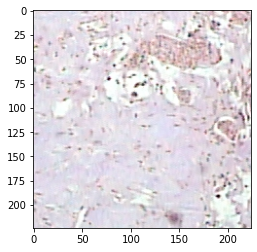

In [ ]:
m,b=next(iter(Data_generator(data_train,labels_train)))
print(m.shape)
print(b.shape)
plt.imshow(m[0])

In [ ]:
import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
optim = keras.optimizers.Adam(learning_rate =0.00008)
model.compile(optim, loss="binary_crossentropy", metrics=['accuracy'])

def step_decay(epoch):
     
     initAlpha = 0.00008
     factor = .6
     dropEvery = 25
     alpha = initAlpha * (factor ** np.floor((1 + epoch) / dropEvery))
     return float(alpha)

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
batch_size =8
TrainSteps = len(data_train) // batch_size     
ValSteps   = len(data_test) // 1
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/breast-cancer-classification/40X/40x_Xception.h5', save_best_only=True, verbose=2, monitor='val_accuracy',mode='max')
csv_logger = CSVLogger('/content/drive/MyDrive/breast-cancer-classification/40X/40x_Xception.csv', append=True)


H = model.fit_generator(Data_generator(data_train,labels_train), epochs = 50 , steps_per_epoch=TrainSteps, validation_data =Data_generator(data_test,labels_test) ,
                validation_steps =ValSteps,
callbacks=[model_checkpoint, csv_logger , LearningRateScheduler(step_decay)],shuffle=True , class_weight=class_weight )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
199/199 [==============================] - ETA: 0s - loss: 0.4809 - accuracy: 0.7670
Epoch 1: val_accuracy improved from -inf to 0.78838, saving model to /content/drive/MyDrive/breast-cancer-classification/40X/40x_Xception.h5
199/199 [==============================] - 64s 247ms/step - loss: 0.4809 - accuracy: 0.7670 - val_loss: 0.4185 - val_accuracy: 0.7884 - lr: 8.0000e-05
Epoch 2/50
199/199 [==============================] - ETA: 0s - loss: 0.1943 - accuracy: 0.9238
Epoch 2: val_accuracy improved from 0.78838 to 0.92653, saving model to /content/drive/MyDrive/breast-cancer-classification/40X/40x_Xception.h5
199/199 [==============================] - 52s 253ms/step - loss: 0.1943 - accuracy: 0.9238 - val_loss: 0.1759 - val_accuracy: 0.9265 - lr: 8.0000e-05
Epoch 3/50
199/199 [==============================] - ETA: 0s - loss: 0.1079 - accuracy: 0.9628
Epoch 3: val_accuracy did not improve from 0.92653
199/199 [==============================] - 49s 247ms/step - loss: 0.1079 -

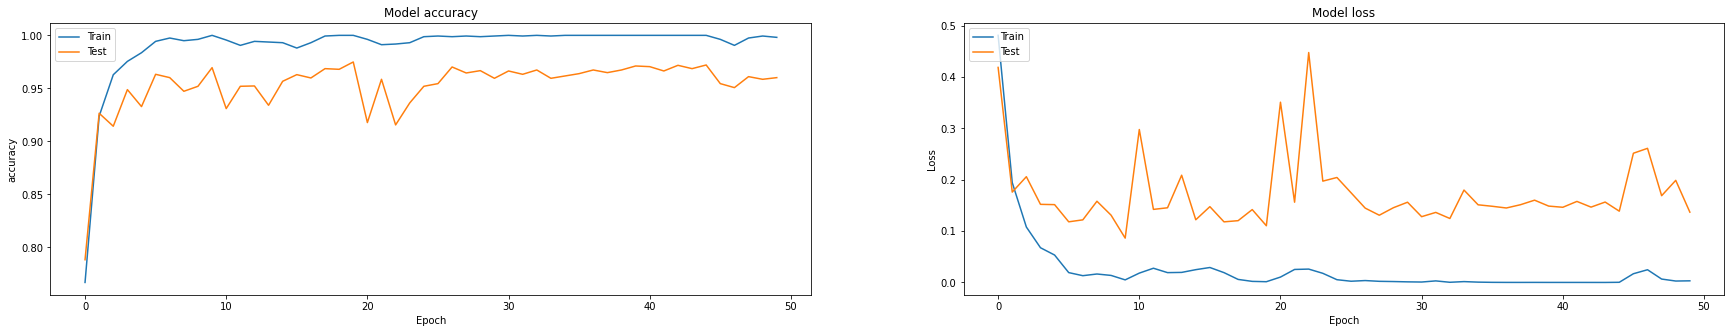

In [ ]:
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
model=tf.keras.models.load_model('/content/drive/MyDrive/breast-cancer-classification/40X/40x_Xception.h5')

In [ ]:
data_test = data_test/255
model.evaluate(data_test, labels_test)

13/13 [==============================] - 5s 202ms/step - loss: 0.0923 - accuracy: 0.9774


[0.09226573258638382, 0.9774436354637146]

In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(data_test, batch_size=1)

[INFO] evaluating network...
399/399 [==============================] - 5s 9ms/step


In [ ]:
predIdxs = np.argmax(predIdxs, axis=1)
testY = np.argmax(labels_test, axis=1)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("precision_score : ",precision_score(testY, predIdxs  ,  average='weighted' ))
print("Recall Score : ",recall_score(testY, predIdxs ,average='weighted'))
print("f1_score : ",f1_score(testY, predIdxs ,average='weighted'))

precision_score :  0.9774984599546004
Recall Score :  0.9774436090225563
f1_score :  0.9774642155595946


In [ ]:
target_names = ['Benign ', 'Malignant']
print(classification_report(testY, predIdxs, target_names=target_names))

              precision    recall  f1-score   support

     Benign        0.96      0.97      0.97       134
   Malignant       0.98      0.98      0.98       265

    accuracy                           0.98       399
   macro avg       0.97      0.98      0.97       399
weighted avg       0.98      0.98      0.98       399



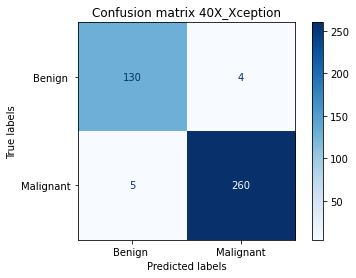

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(testY,predIdxs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.title('Confusion matrix 40X_Xception')
plt.ylabel("True labels")
plt.show()

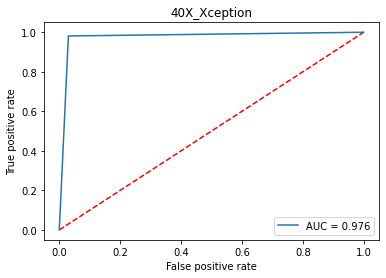

In [ ]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
roc_log = roc_auc_score(testY , predIdxs)
false_positive_rate, true_positive_rate, threshold = roc_curve( testY , predIdxs)
area_under_curve = auc(false_positive_rate, true_positive_rate)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('40X_Xception')
plt.legend(loc='best')
plt.show()
plt.close()